Shape of dataset: (4746, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

First 5 rows:
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area 

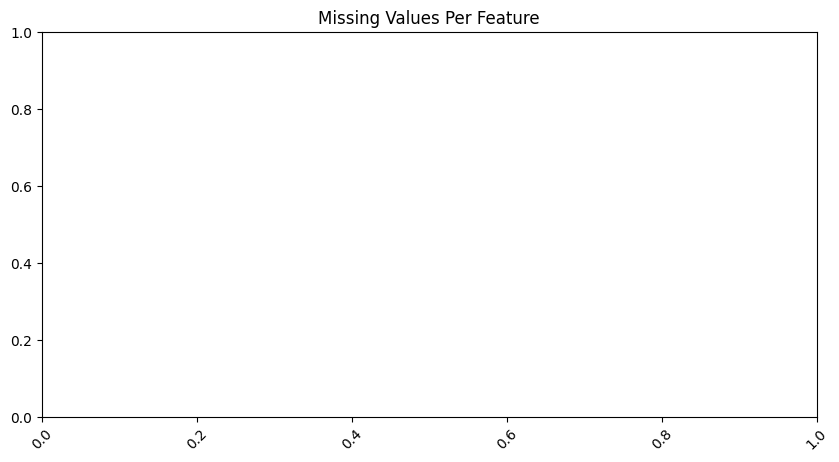


Summary Statistics:
            count          mean           std     min      25%      50%  \
BHK       4746.0      2.083860      0.832256     1.0      2.0      2.0   
Rent      4746.0  34993.451327  78106.412937  1200.0  10000.0  16000.0   
Size      4746.0    967.490729    634.202328    10.0    550.0    850.0   
Bathroom  4746.0      1.965866      0.884532     1.0      1.0      2.0   

              75%        max  
BHK           3.0        6.0  
Rent      33000.0  3500000.0  
Size       1200.0     8000.0  
Bathroom      2.0       10.0  


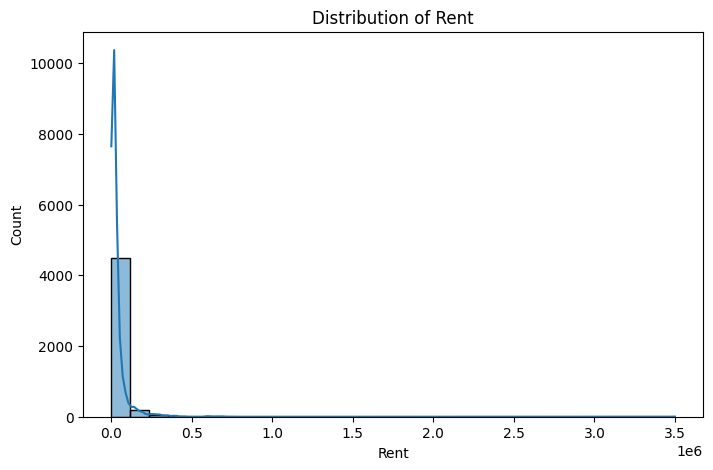

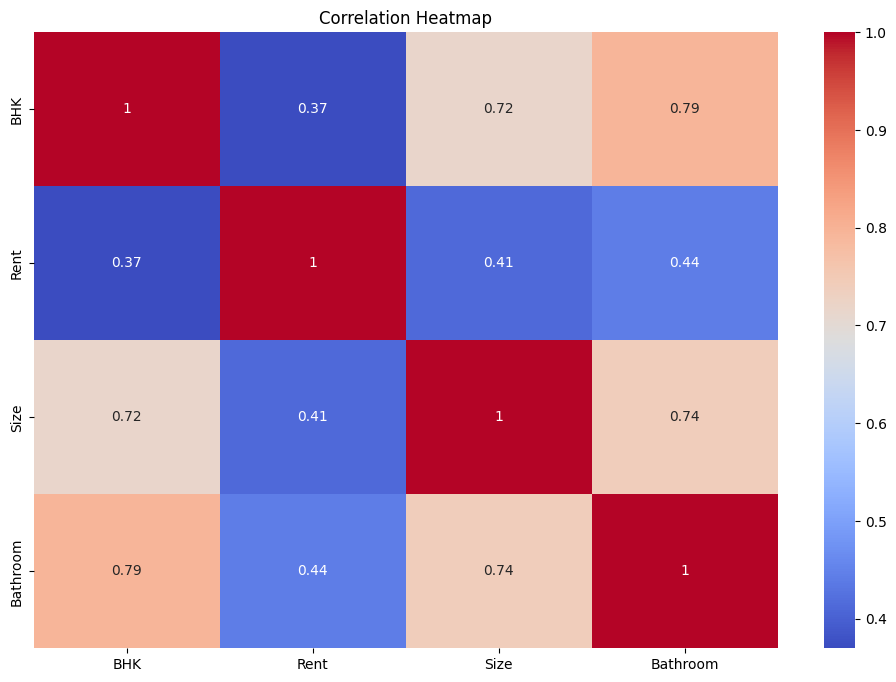

ValueError: Could not interpret value `column_name` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [7]:
# ---------------------------
# Imports
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

# ---------------------------
# Load dataset
# ---------------------------
df = pd.read_csv(r"C:\Users\aryan\Downloads\House_Rent_Dataset.csv")

# ---------------------------
# Basic info
# ---------------------------
print("Shape of dataset:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# ---------------------------
# Day 2: Exploratory Data Analysis (EDA)
# ---------------------------

# Missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Missing Values Per Feature")
plt.show()

# Summary statistics
print("\nSummary Statistics:\n", df.describe().T)

# Target distribution
target = "Rent"
plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f"Distribution of {target}")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for numeric features
num_features = ["Rent", "Size"]
for col in num_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="column_name", data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplots for categorical features (BEFORE encoding)
cat_features = ["City", "FurnishingStatus", "AreaType"]
for col in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ---------------------------
# Day 3: Data Cleaning & Encoding
# ---------------------------

# Step 1: Fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)  # Median for numeric

cat_cols = df.select_dtypes(include='object').columns.tolist()
for cat in cat_cols:
    df[cat].fillna(df[cat].mode()[0], inplace=True)  # Mode for categorical

print("\nAfter filling missing values:\n", df.isnull().sum())

# Step 2: Encode categorical features
categorical_features = ["City", "AreaType", "FurnishingStatus"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nAfter encoding:")
print(df.head())

# Step 3: Feature Transformation (Target variable)
df["Rent"] = np.log1p(df["Rent"])  # Log-transform target

# Step 4: Feature Scaling
numeric_features = ["Size", "BHK", "Floor"]  # Make sure these exist in your dataset
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nAfter scaling numerical features:")
print(df[numeric_features].head())

# Step 5: Save Processed Data
df.to_csv("processed_data.csv", index=False)
print("\n✅ Processed dataset saved as processed_data.csv")
